  CODE                 DESCRIPTION  QTY  UNIT PRICE       DATE      TIME  \
0   8A   Black Paper Sauce Chicken    1         8.0  1/12/2024  11:10:47   
1   1B   Salt Egg Butter Milk Fish    1         9.0  1/12/2024  11:14:42   
2   2A  Sweet & Sour Sauce Chicken    1         7.0  1/12/2024  11:14:42   
3   14            Cantonise Yi Mee    1         6.5  1/12/2024  11:18:47   
4   2B     Sweet & Sour Sauce Fish    1         8.0  1/12/2024  11:33:10   

       TYPE PAYMENT METHOD  TOTAL AMOUNT  
0   Dine In           Cash           8.0  
1   Dine In           Cash           9.0  
2   Dine In           Cash           7.0  
3   Dine In           Cash           6.5  
4  Delivery         QR Pay           8.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            6795 non-null   object 
 1   DESCRIPTION     6798 non-null   object 

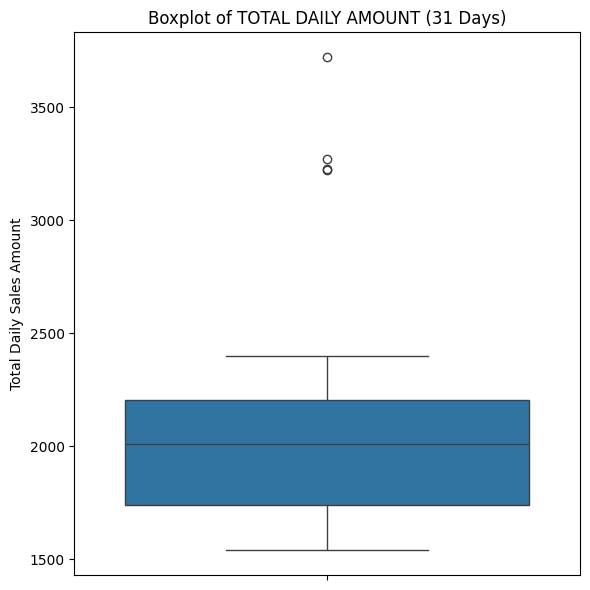

Daily Sales Statistics:
Mean: RM2000–RM3000
Median: 2011.00
Mode: 1539.00
Standard Deviation: 581.69
Range: 2183.00

Summary Statistics for Transaction Totals by Customers
Mean: 15.84
Median: 16.00
Mode: 8.00
Standard Deviation: 6.79
Variance: 46.17
Range: 41.00

Frequency of TYPE (per transaction):
 TYPE
Dine In     1834
Delivery    1791
Name: count, dtype: int64

Frequency of PAYMENT METHOD (per transaction):
 PAYMENT METHOD
QR Pay    2747
Cash       878
Name: count, dtype: int64

Cross-tabulation: TYPE vs PAYMENT METHOD (per transaction)
 PAYMENT METHOD  Cash  QR Pay
TYPE                        
Delivery           0    1791
Dine In          878     956


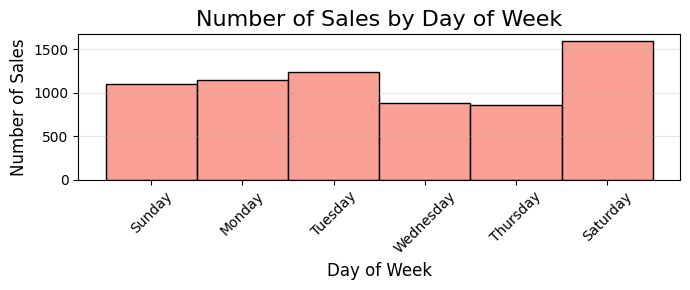

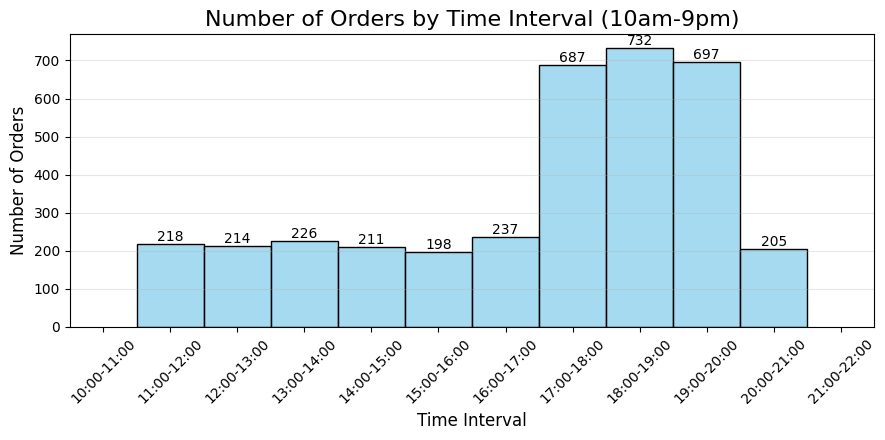

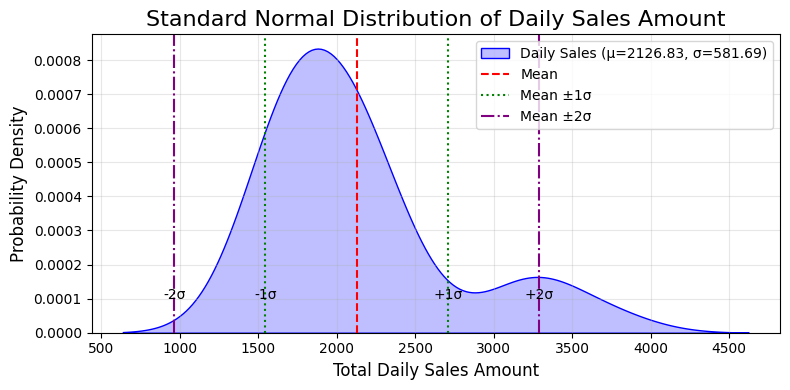


ASSOCIATION RULE MINING

Transaction item counts:
item_count
1    1394
2    1302
3     922
4       3
6       2
5       2
Name: count, dtype: int64

Using 2231 multi-item transactions

Item frequencies:
6A     384
6B     373
1B     263
1A     251
1MA    246
1MB    237
5A     202
4A     195
4B     185
3B     185
2A     183
2B     181
14     179
11     176
8A     175
9B     173
13     173
11B    172
7A     172
11C    171
dtype: int64

Frequent itemsets (top 20):
      support  itemsets
18   0.172120      (6A)
19   0.167190      (6B)
7    0.117884      (1B)
6    0.112506      (1A)
8    0.110264     (1MA)
9    0.106230     (1MB)
16   0.090542      (5A)
148  0.090094  (6B, 6A)
14   0.087405      (4A)
15   0.082922      (4B)
13   0.082922      (3B)
10   0.082026      (2A)
11   0.081130      (2B)
5    0.080233      (14)
0    0.078888      (11)
22   0.078440      (8A)
25   0.077544      (9B)
4    0.077544      (13)
2    0.077095     (11B)
20   0.077095      (7A)

All association rules:
    ant

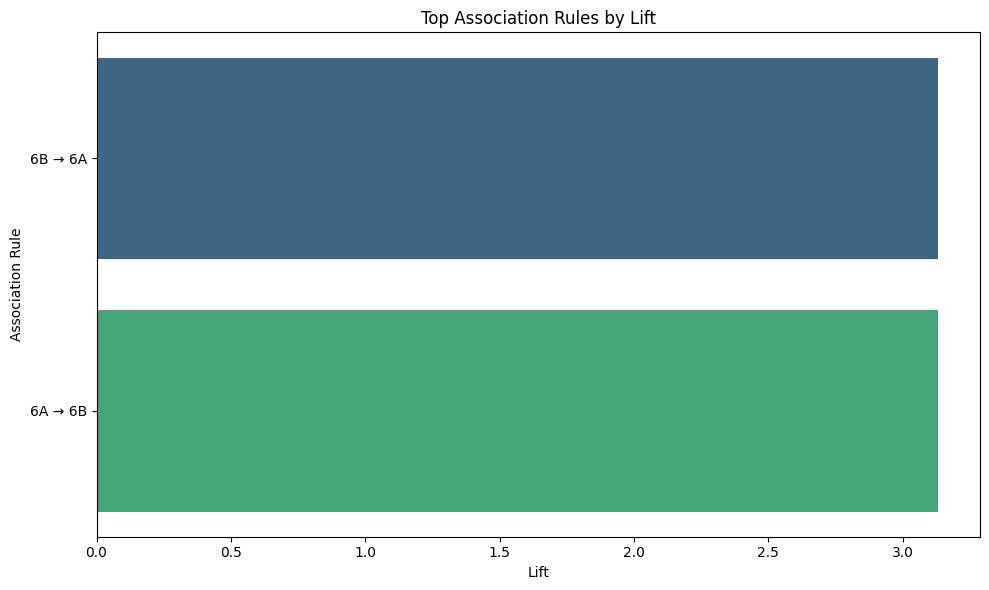

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df= pd.read_csv('YummyFresh_OriData.csv')

# print first 5 row for checking the structure of the data
print(df.head(5))

# Check the data type of each column
print(df.info())

# Check the missing value in the dataset
print('Missing values: ')
print(df.isnull().sum())

df['TYPE']= df['TYPE'].fillna(df['TYPE'].mode()[0])

# 1. Create a mapping from DESCRIPTION to CODE NUMBER (only from non-missing rows)
code_map = df.dropna(subset=['CODE']).drop_duplicates(subset=['DESCRIPTION'])[['DESCRIPTION', 'CODE']]
code_map = dict(zip(code_map['DESCRIPTION'], code_map['CODE']))

# 2. Use the map to fill missing CODE NUMBERs
df['CODE'] = df.apply(
    lambda row: code_map[row['DESCRIPTION']] if pd.isnull(row['CODE']) and row['DESCRIPTION'] in code_map else row['CODE'],
    axis=1
)

print('Missing values after cleanning: ')
print(df.isnull().sum())

# Convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# Pad time values missing seconds (e.g., '17:36' -> '17:36:00')
df['TIME'] = df['TIME'].apply(lambda x: x if len(x.strip().split(':')) == 3 else x + ':00')

df=df.drop(columns=['DESCRIPTION'])

# Create a new column 'day' from the DATE
df['DAY'] = df['DATE'].dt.day_name()

df.to_excel('YummyFresh_ProcessData.xlsx', index=False)

# Group by 'DATE' and sum the 'TOTAL AMOUNT'
daily_sales = df.groupby('DATE')['TOTAL AMOUNT'].sum()
print(daily_sales)
# Plot a single boxplot of 31 daily totals
plt.figure(figsize=(6, 6))
sns.boxplot(y=daily_sales)
plt.title('Boxplot of TOTAL DAILY AMOUNT (31 Days)')
plt.ylabel('Total Daily Sales Amount')
plt.tight_layout()
plt.show()


# Group by DATE and TIME first to get transaction totals (same DATE+TIME = one transaction)
transaction_totals = df.groupby(['DATE', 'TIME'])['TOTAL AMOUNT'].sum().reset_index()
# Then group by DATE to get daily totals
daily_sales = transaction_totals.groupby('DATE')['TOTAL AMOUNT'].sum()
# Calculate statistics
mean_daily = daily_sales.mean()
median_daily = daily_sales.median()
mode_daily = daily_sales.mode().values[0]  # first mode if multiple
std_daily = daily_sales.std()
range_daily = daily_sales.max() - daily_sales.min()
# Categorize mean into range
if mean_daily <= 1000:
    mean_range = "Below RM1000"
elif mean_daily <= 2000:
    mean_range = "RM1000–RM2000"
elif mean_daily <= 3000:
    mean_range = "RM2000–RM3000"
else:
    mean_range = "Above RM3000"
# DISPLAY RESULTS
print("Daily Sales Statistics:")
print(f"Mean: {mean_range}")
print(f"Median: {median_daily:.2f}")
print(f"Mode: {mode_daily:.2f}")
print(f"Standard Deviation: {std_daily:.2f}")
print(f"Range: {range_daily:.2f}")


# Calculate statistics on these transaction totals
total_amount_series = transaction_totals['TOTAL AMOUNT']
# CENTRAL TENDENCY
mean_value = total_amount_series.mean()
median_value = total_amount_series.median()
mode_value = total_amount_series.mode().values[0]  # first mode if multiple
# DISPERSION
standard_deviation = total_amount_series.std()
variance = total_amount_series.var()
value_range = total_amount_series.max() - total_amount_series.min()
# DISPLAY RESULTS
print("\nSummary Statistics for Transaction Totals by Customers")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Mode: {mode_value:.2f}")
print(f"Standard Deviation: {standard_deviation:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Range: {value_range:.2f}")


# Frequency distribution for TYPE
# Frequency of TYPE at transaction level (grouped by DATE+TIME)
transaction_types = df.groupby(['DATE', 'TIME'])['TYPE'].first().value_counts()
print("\nFrequency of TYPE (per transaction):\n", transaction_types)

# Frequency of PAYMENT METHOD at transaction level
transaction_payments = df.groupby(['DATE', 'TIME'])['PAYMENT METHOD'].first().value_counts()
print("\nFrequency of PAYMENT METHOD (per transaction):\n", transaction_payments)

# Cross-tab: TYPE vs PAYMENT METHOD
transaction_type_vs_payment = pd.crosstab(
    df.groupby(['DATE', 'TIME'])['TYPE'].first(),
    df.groupby(['DATE', 'TIME'])['PAYMENT METHOD'].first()
)
print("\nCross-tabulation: TYPE vs PAYMENT METHOD (per transaction)\n", transaction_type_vs_payment)


# Histogram of number of sales by day of week
plt.figure(figsize=(7, 3))
sns.histplot(df['DAY'], bins=7, color='salmon', discrete=True)
plt.title('Number of Sales by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# Histogram of number of sales between the time interval (10am to 9pm only)
# Parse TIME with explicit format
df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.time
df['HOUR'] = pd.to_datetime(df['TIME'].astype(str), format='%H:%M:%S').dt.hour

# Count unique orders (group by DATE+TIME)
# First get unique transactions (same DATE+TIME is one order)
transactions = df.groupby(['DATE', 'TIME']).size().reset_index(name='COUNT')

# Extract hour from the transaction times with explicit format
transactions['HOUR'] = pd.to_datetime(transactions['TIME'].astype(str), format='%H:%M:%S').dt.hour

# Filter to only include hours from 10 to 21 (10am to 9pm)
transactions = transactions[(transactions['HOUR'] >= 10) & (transactions['HOUR'] <= 21)]

# Create bins and labels for 10am to 9pm
bins = range(10, 22)  # 10 to 21 hours
labels = [f"{i}:00-{i+1}:00" for i in range(10, 21)] + ["21:00-22:00"]

# Plot histogram of transactions by hour
plt.figure(figsize=(9, 4.5))
ax = sns.histplot(transactions['HOUR'], bins=bins, color='skyblue',
                 edgecolor='black', discrete=True)

# Customize the plot
plt.title('Number of Orders by Time Interval (10am-9pm)', fontsize=16)
plt.xlabel('Time Interval', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(10, 22), labels, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.xlim(9.5, 21.5)  # Set x-axis limits to show only our range

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()


# Standard normal distribution graph for the total sales in day
# Calculate daily sales totals considering same DATE+TIME as one transaction
# Group by DATE and TIME to get transaction totals
transaction_totals = df.groupby(['DATE', 'TIME'])['TOTAL AMOUNT'].sum().reset_index()

# Then group by DATE to get daily totals
daily_sales = transaction_totals.groupby('DATE')['TOTAL AMOUNT'].sum().reset_index()

# Calculate mean and standard deviation for the normal distribution
mean_sales = daily_sales['TOTAL AMOUNT'].mean()
std_sales = daily_sales['TOTAL AMOUNT'].std()

# Create the normal distribution plot
plt.figure(figsize=(8, 4))

# Plot the KDE (normal distribution curve)
sns.kdeplot(daily_sales['TOTAL AMOUNT'], color='blue', fill=True,
            label=f'Daily Sales (μ={mean_sales:.2f}, σ={std_sales:.2f})')

# Add vertical lines for mean and ±1σ, ±2σ
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(mean_sales + std_sales, color='green', linestyle=':', label='Mean ±1σ')
plt.axvline(mean_sales - std_sales, color='green', linestyle=':')
plt.axvline(mean_sales + 2*std_sales, color='purple', linestyle='-.', label='Mean ±2σ')
plt.axvline(mean_sales - 2*std_sales, color='purple', linestyle='-.')

# Add title and labels
plt.title('Standard Normal Distribution of Daily Sales Amount', fontsize=16)
plt.xlabel('Total Daily Sales Amount', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Add annotations for the standard deviations
plt.text(mean_sales + std_sales, 0.0001, '+1σ', ha='center')
plt.text(mean_sales - std_sales, 0.0001, '-1σ', ha='center')
plt.text(mean_sales + 2*std_sales, 0.0001, '+2σ', ha='center')
plt.text(mean_sales - 2*std_sales, 0.0001, '-2σ', ha='center')
plt.tight_layout()
plt.show()


# ASSOCIATION RULE MINING
print("\nASSOCIATION RULE MINING")
# Create transaction data
transactions = df.groupby(['DATE', 'TIME'])['CODE'].apply(list).reset_index(name='ITEMS')

# Analyze transaction lengths
transactions['item_count'] = transactions['ITEMS'].apply(len)
print("\nTransaction item counts:")
print(transactions['item_count'].value_counts())

# Filter out single-item transactions if needed
multi_item_trans = transactions[transactions['item_count'] > 1]
print(f"\nUsing {len(multi_item_trans)} multi-item transactions")

# Prepare data
transaction_list = multi_item_trans['ITEMS'].tolist()
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Show item frequencies
print("\nItem frequencies:")
print(df_encoded.sum().sort_values(ascending=False).head(20))

# Find frequent itemsets with lower support
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)
print("\nFrequent itemsets (top 20):")
print(frequent_itemsets.sort_values('support', ascending=False).head(20))

if not frequent_itemsets.empty:
    # Generate rules with adjusted thresholds
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
    print("\nAll association rules:")
    print(rules.sort_values('lift', ascending=False))

    # Filter rules
    strong_rules = rules[(rules['confidence'] > 0.3) & (rules['lift'] > 1)].copy()

    if not strong_rules.empty:
        # Format rules
        strong_rules.loc[:, 'antecedents'] = strong_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
        strong_rules.loc[:, 'consequents'] = strong_rules['consequents'].apply(lambda x: ', '.join(list(x)))
        strong_rules.loc[:, 'rule'] = strong_rules['antecedents'] + " → " + strong_rules['consequents']

        # Visualize
        plt.figure(figsize=(10, 6))
        top_rules = strong_rules.sort_values('lift', ascending=False).head(10)
        sns.barplot(x='lift', y='rule', data=top_rules, hue='rule', palette='viridis', legend=False)
        plt.title('Top Association Rules by Lift')
        plt.xlabel('Lift')
        plt.ylabel('Association Rule')
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo strong rules found with current thresholds. Try lowering confidence/lift requirements.")
else:
    print("\nNo frequent itemsets found. Try lowering min_support further.")